## Analyzing Air Quality Index (AQI) Trends in a City
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutantlevels, and AQI
values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots tovisualize their trends
over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates ortime periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for differentpollutant
categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values andpollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate colorschemes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("air_quelity_index.csv", encoding="cp1252")
data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20736\1572006141.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("air_quelity_index.csv", encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
# defining columns of importance, which shall be used reguarly
IMP_COLS= ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [18]:
# invoking SimpleImputer to fill missing values
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [6]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
data['so2'].fillna(data['so2'].mean(), inplace=True)
data['no2'].fillna(data['no2'].mean(), inplace=True)
data['rspm'].fillna(data['rspm'].mean(), inplace=True)
data['spm'].fillna(data['spm'].mean(), inplace=True)
data['pm2_5'].fillna(data['pm2_5'].mean(), inplace=True)
data['type'].fillna(data['type'].mode()[0],inplace=True)

In [12]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [19]:
#Changing types to uniform format
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,108.832784,220.78348,NaN,40.791467,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,108.832784,220.78348,NaN,40.791467,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,108.832784,220.78348,NaN,40.791467,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,108.832784,220.78348,NaN,40.791467,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,108.832784,220.78348,NaN,40.791467,1990-03-01


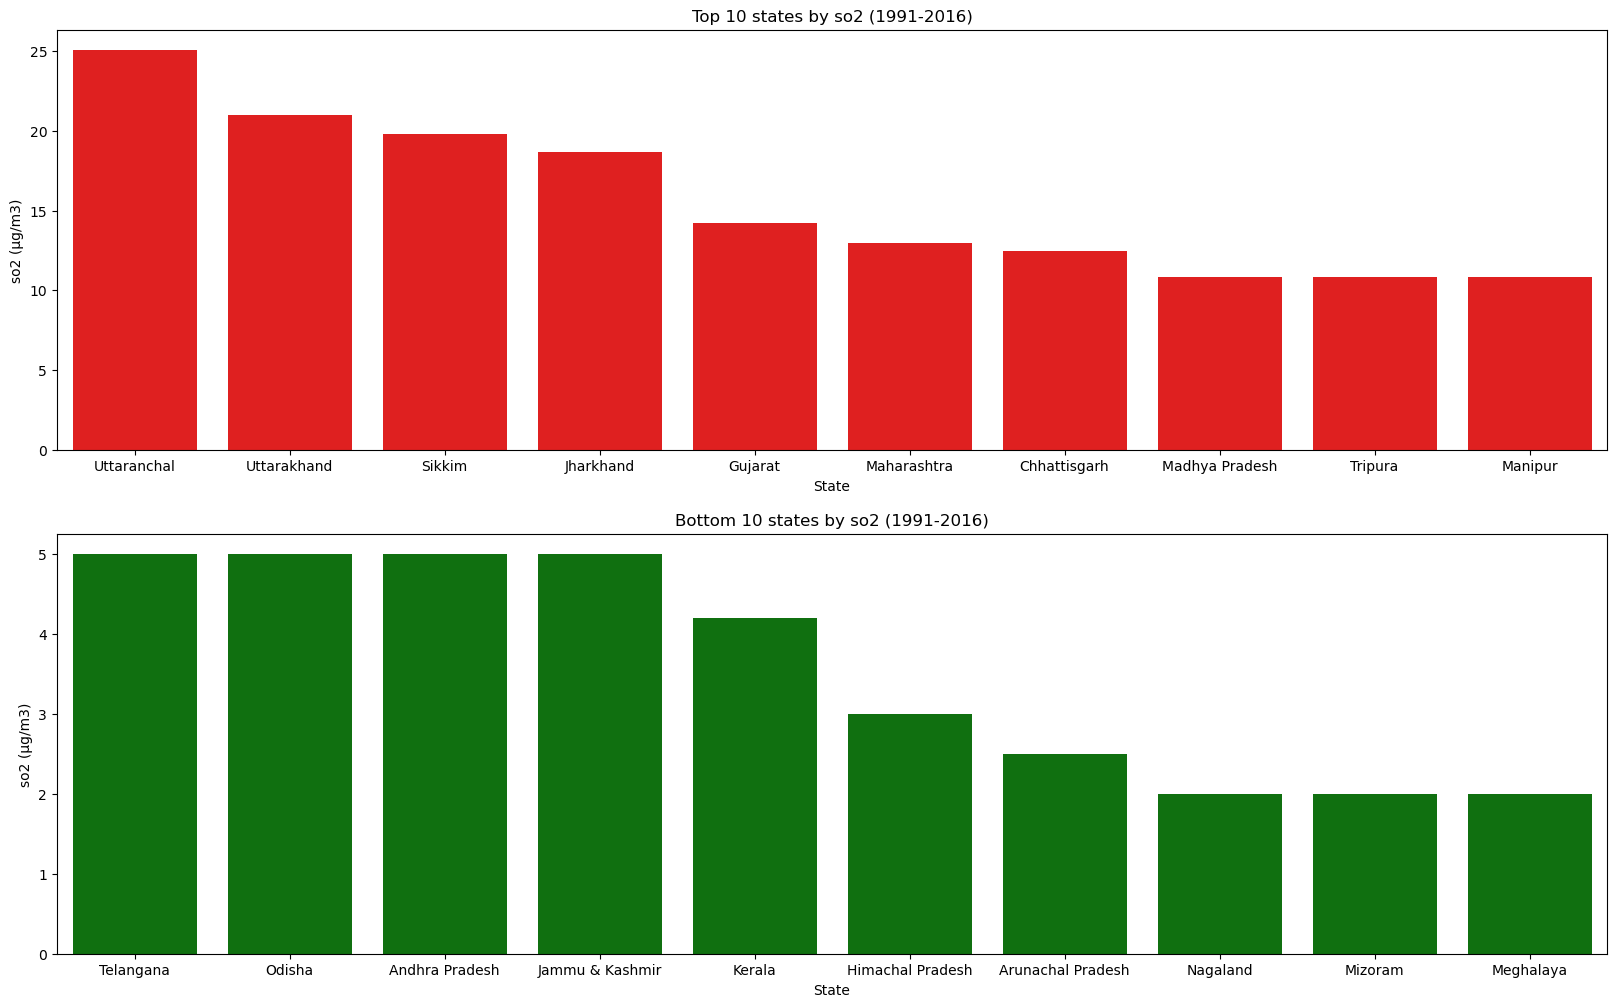

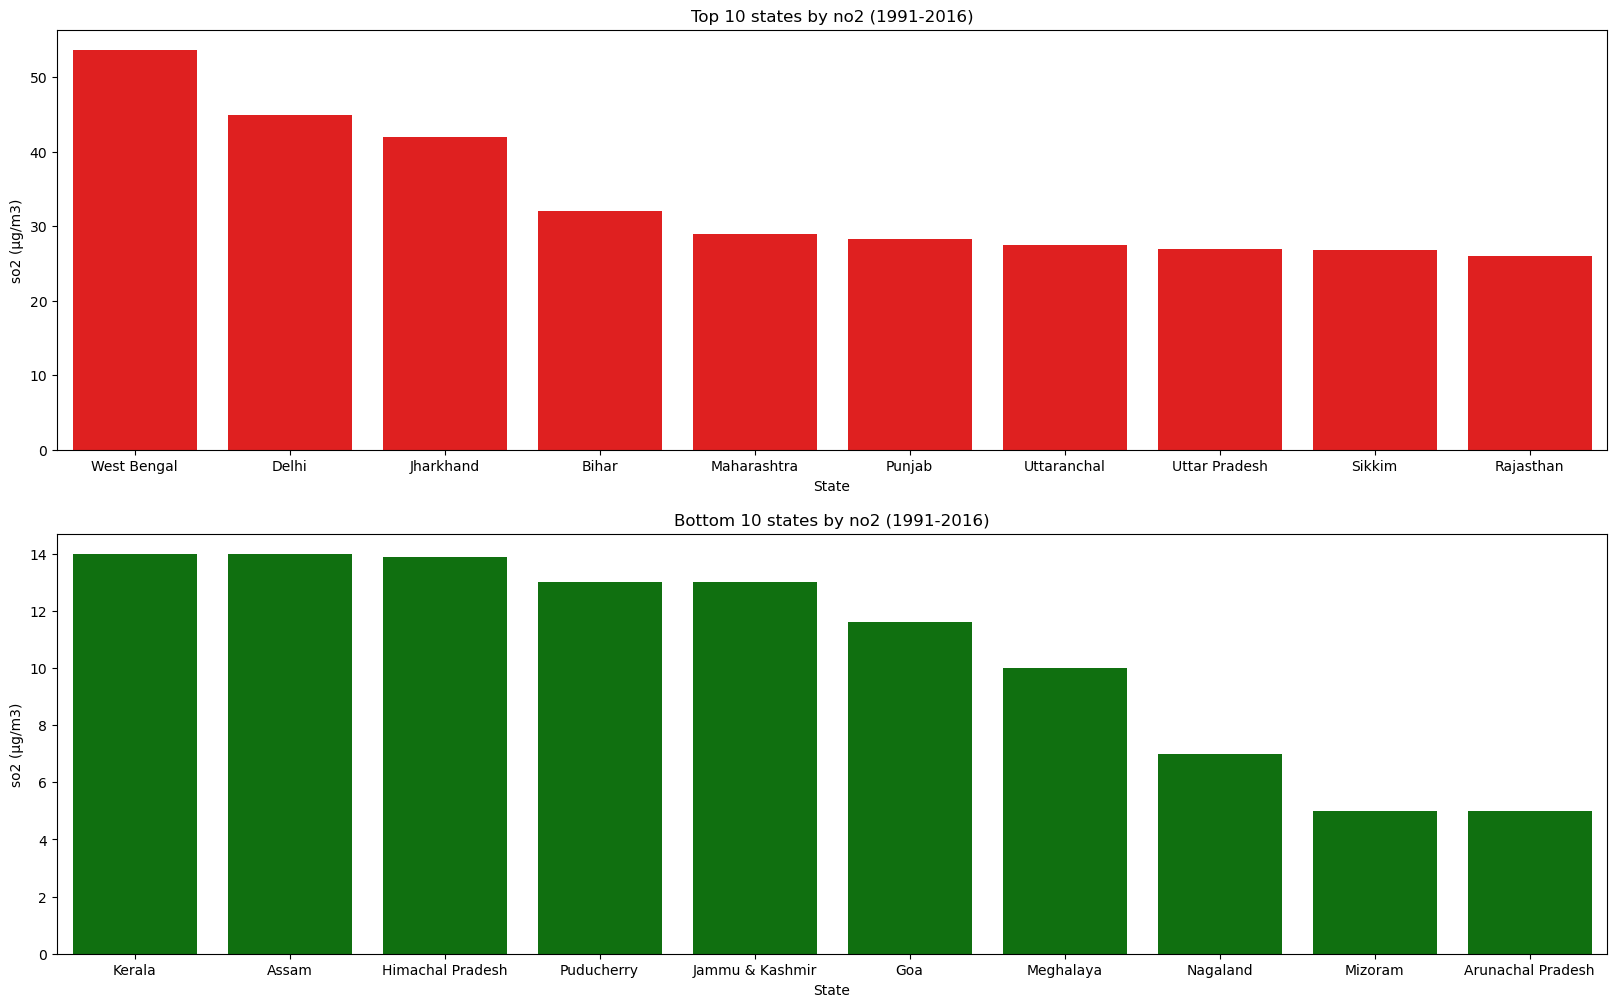

In [20]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")

top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

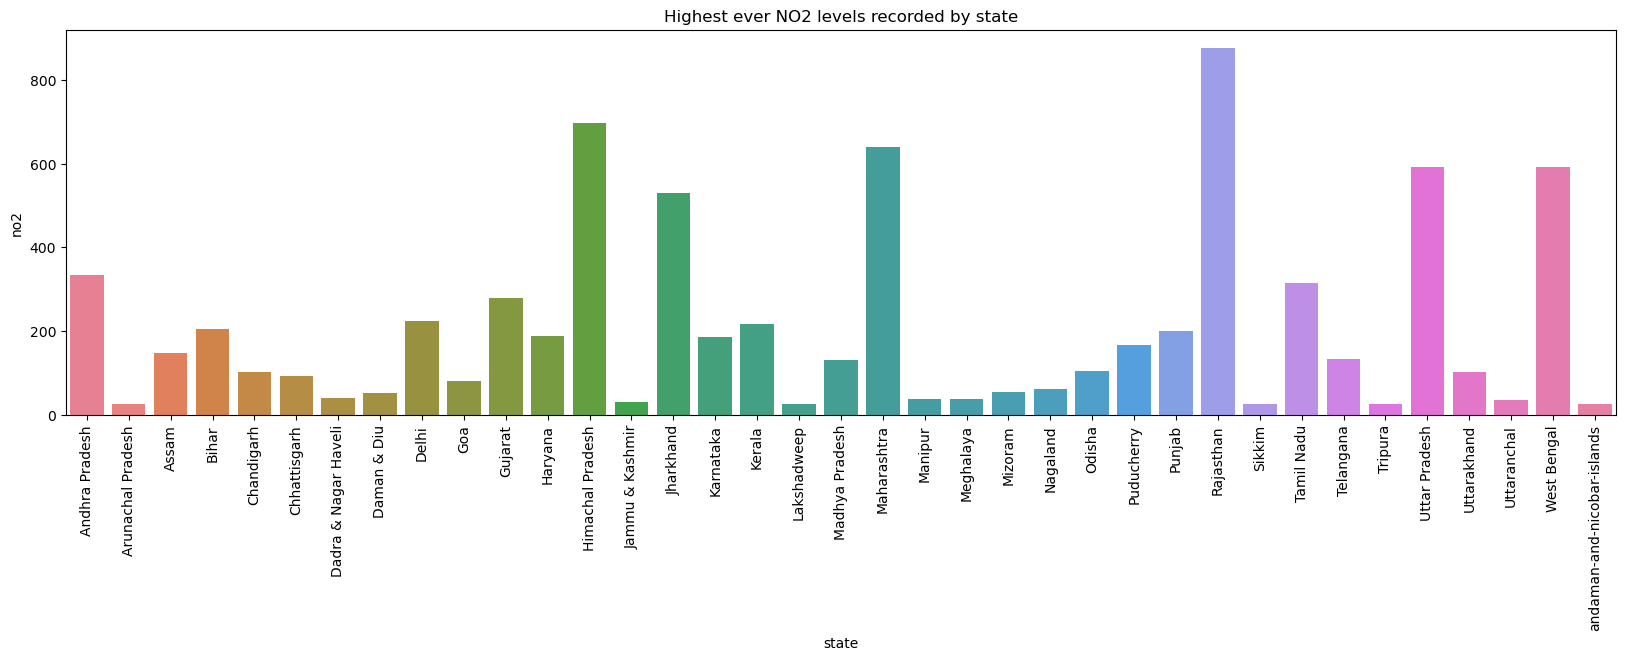

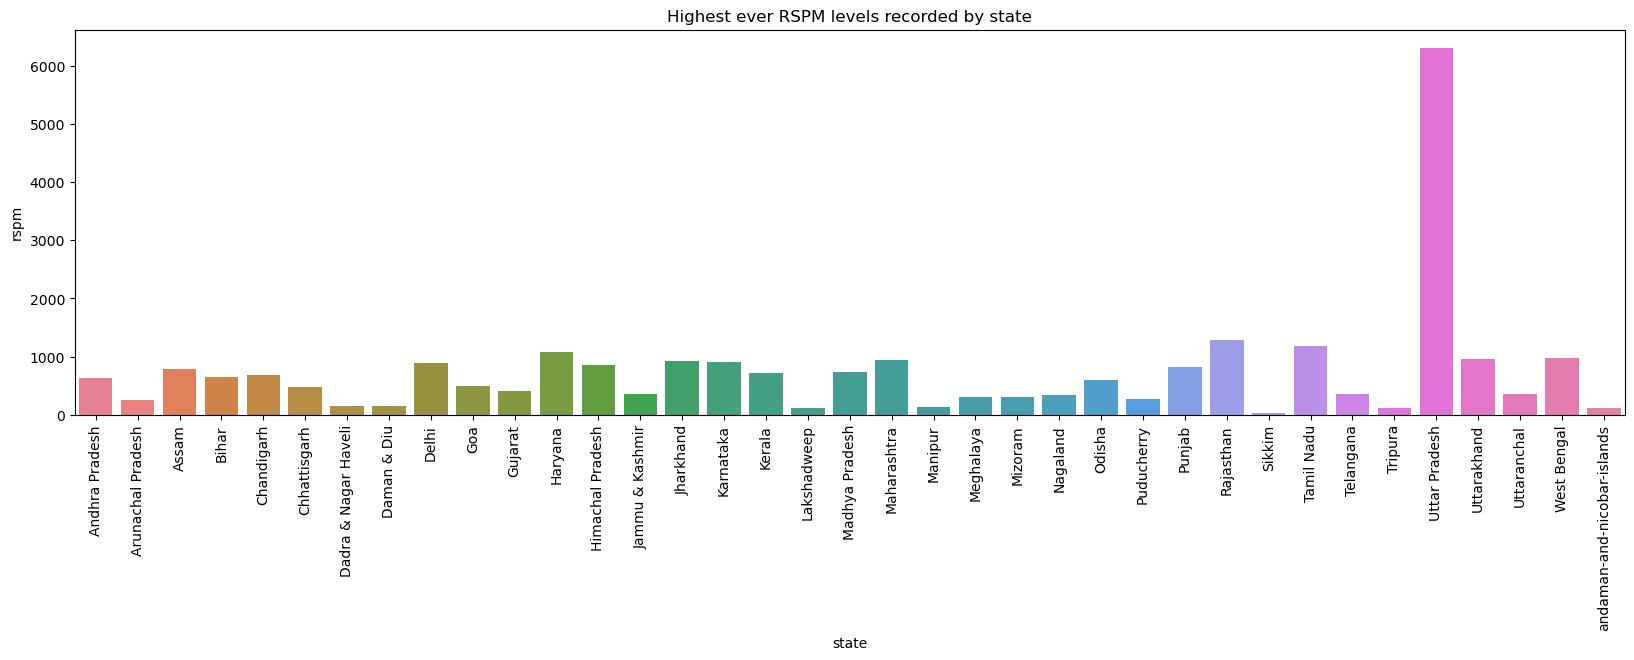

In [21]:

# Defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20, 5))

    # Select the maximum value for the given indicator grouped by state
    ind = data[[indicator, 'state']].groupby('state', as_index=False).max()

    # Set a different color for each state
    num_states = ind['state'].nunique()
    colors = sns.color_palette('husl', num_states)  # Using 'husl' palette for variety in colors

    # Plot the barplot with custom colors
    highest = sns.barplot(x='state', y=indicator, data=ind, palette=colors)

    # Set title and rotate x-axis labels
    highest.set_title(f"Highest ever {indicator.upper()} levels recorded by state")
    plt.xticks(rotation=90)
    plt.show()

# Example usage
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

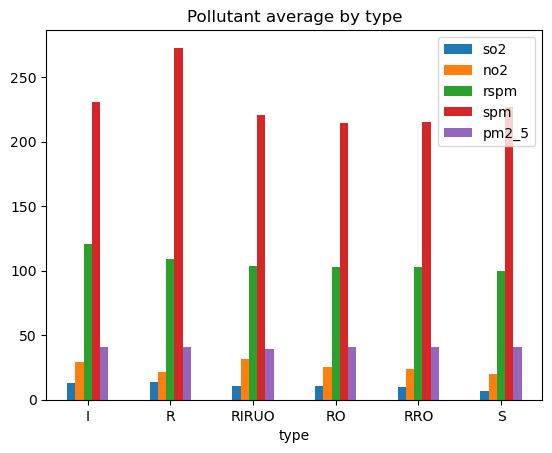

In [22]:
# Plotting pollutant average by type
# defining a function to plot pollutant averages by type for a given indicator
def type_avg(indicator=""):
    # Selecting only numeric columns (IMP_COLS) and grouping by 'type'
    # Excluding 'date' from the grouping as it's likely causing the TypeError
    type_avg = data[IMP_COLS + ['type']].groupby("type").mean()

    if not indicator:
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

type_avg('so2')

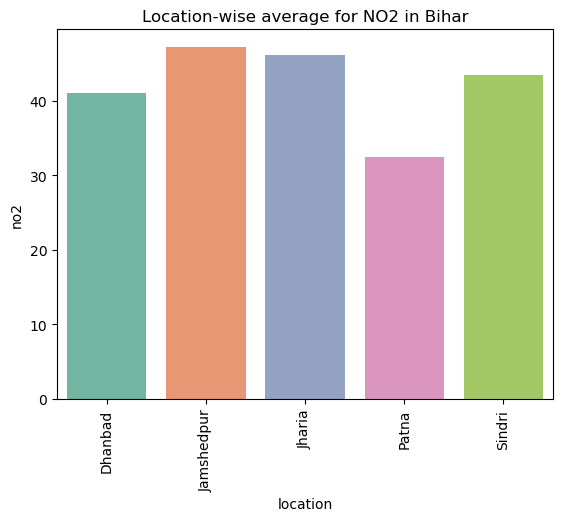

In [23]:
def location_avgs(state, indicator="so2"):
    # Filter the data for the given state
    state_data = data[data['state'] == state]

    # Calculate the mean for each location in the state
    locs = state_data.groupby(['location'])[IMP_COLS].mean().reset_index()

    # Set a different color for each location
    num_locations = locs['location'].nunique()
    colors = sns.color_palette('Set2', num_locations)  # 'Set2' is just an example, you can choose different palettes

    # Plot the averages using seaborn
    sns.barplot(x='location', y=indicator, data=locs, palette=colors)

    # Adding title and rotating x-axis labels
    plt.title(f"Location-wise average for {indicator.upper()} in {state}")
    plt.xticks(rotation=90)
    plt.show()

# Example usage
location_avgs("Bihar", "no2")